<a href="https://colab.research.google.com/github/sapan-s2/AI_Austin_course/blob/main/Descision_tree_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [42]:
creditData = pd.read_csv("credit.csv")

In [43]:
creditData.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [44]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [45]:
creditData.shape

(1000, 17)

In [21]:
creditData.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [50]:
for feature in creditData.columns:
 if creditData[feature].dtype == 'object':
   creditData[feature] = pd.Categorical(creditData[feature])

In [51]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [35]:
creditData.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [47]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [48]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 }
                    }

oneHotCols=["purpose","housing","other_credit","job"]

In [49]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [39]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [52]:
X = creditData.drop("default" , axis=1)
y = creditData.pop("default")

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [54]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [55]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.6933333333333334


In [56]:
y.sum(axis=0)

300

In [57]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

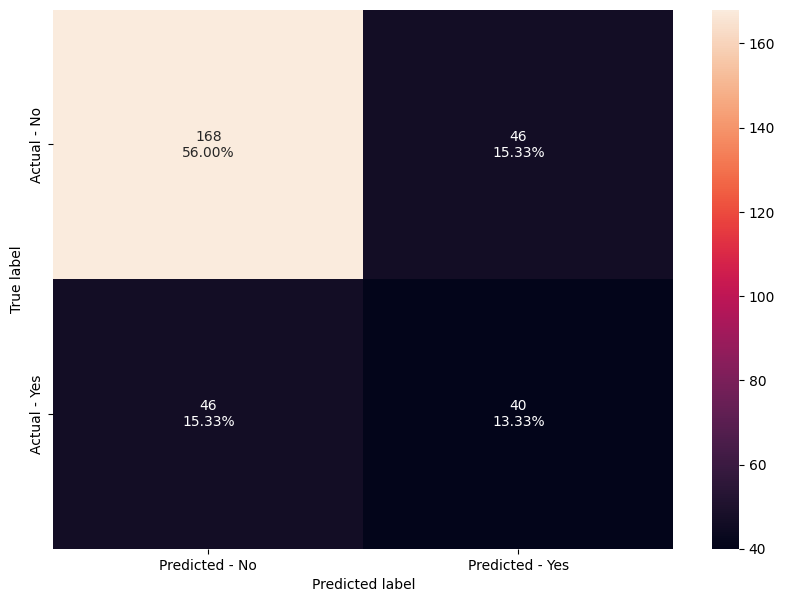

In [59]:
make_confusion_matrix(dTree,y_test)

In [60]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.46511627906976744


In [62]:
feature_names= list(X.columns)
print(feature_names)

['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


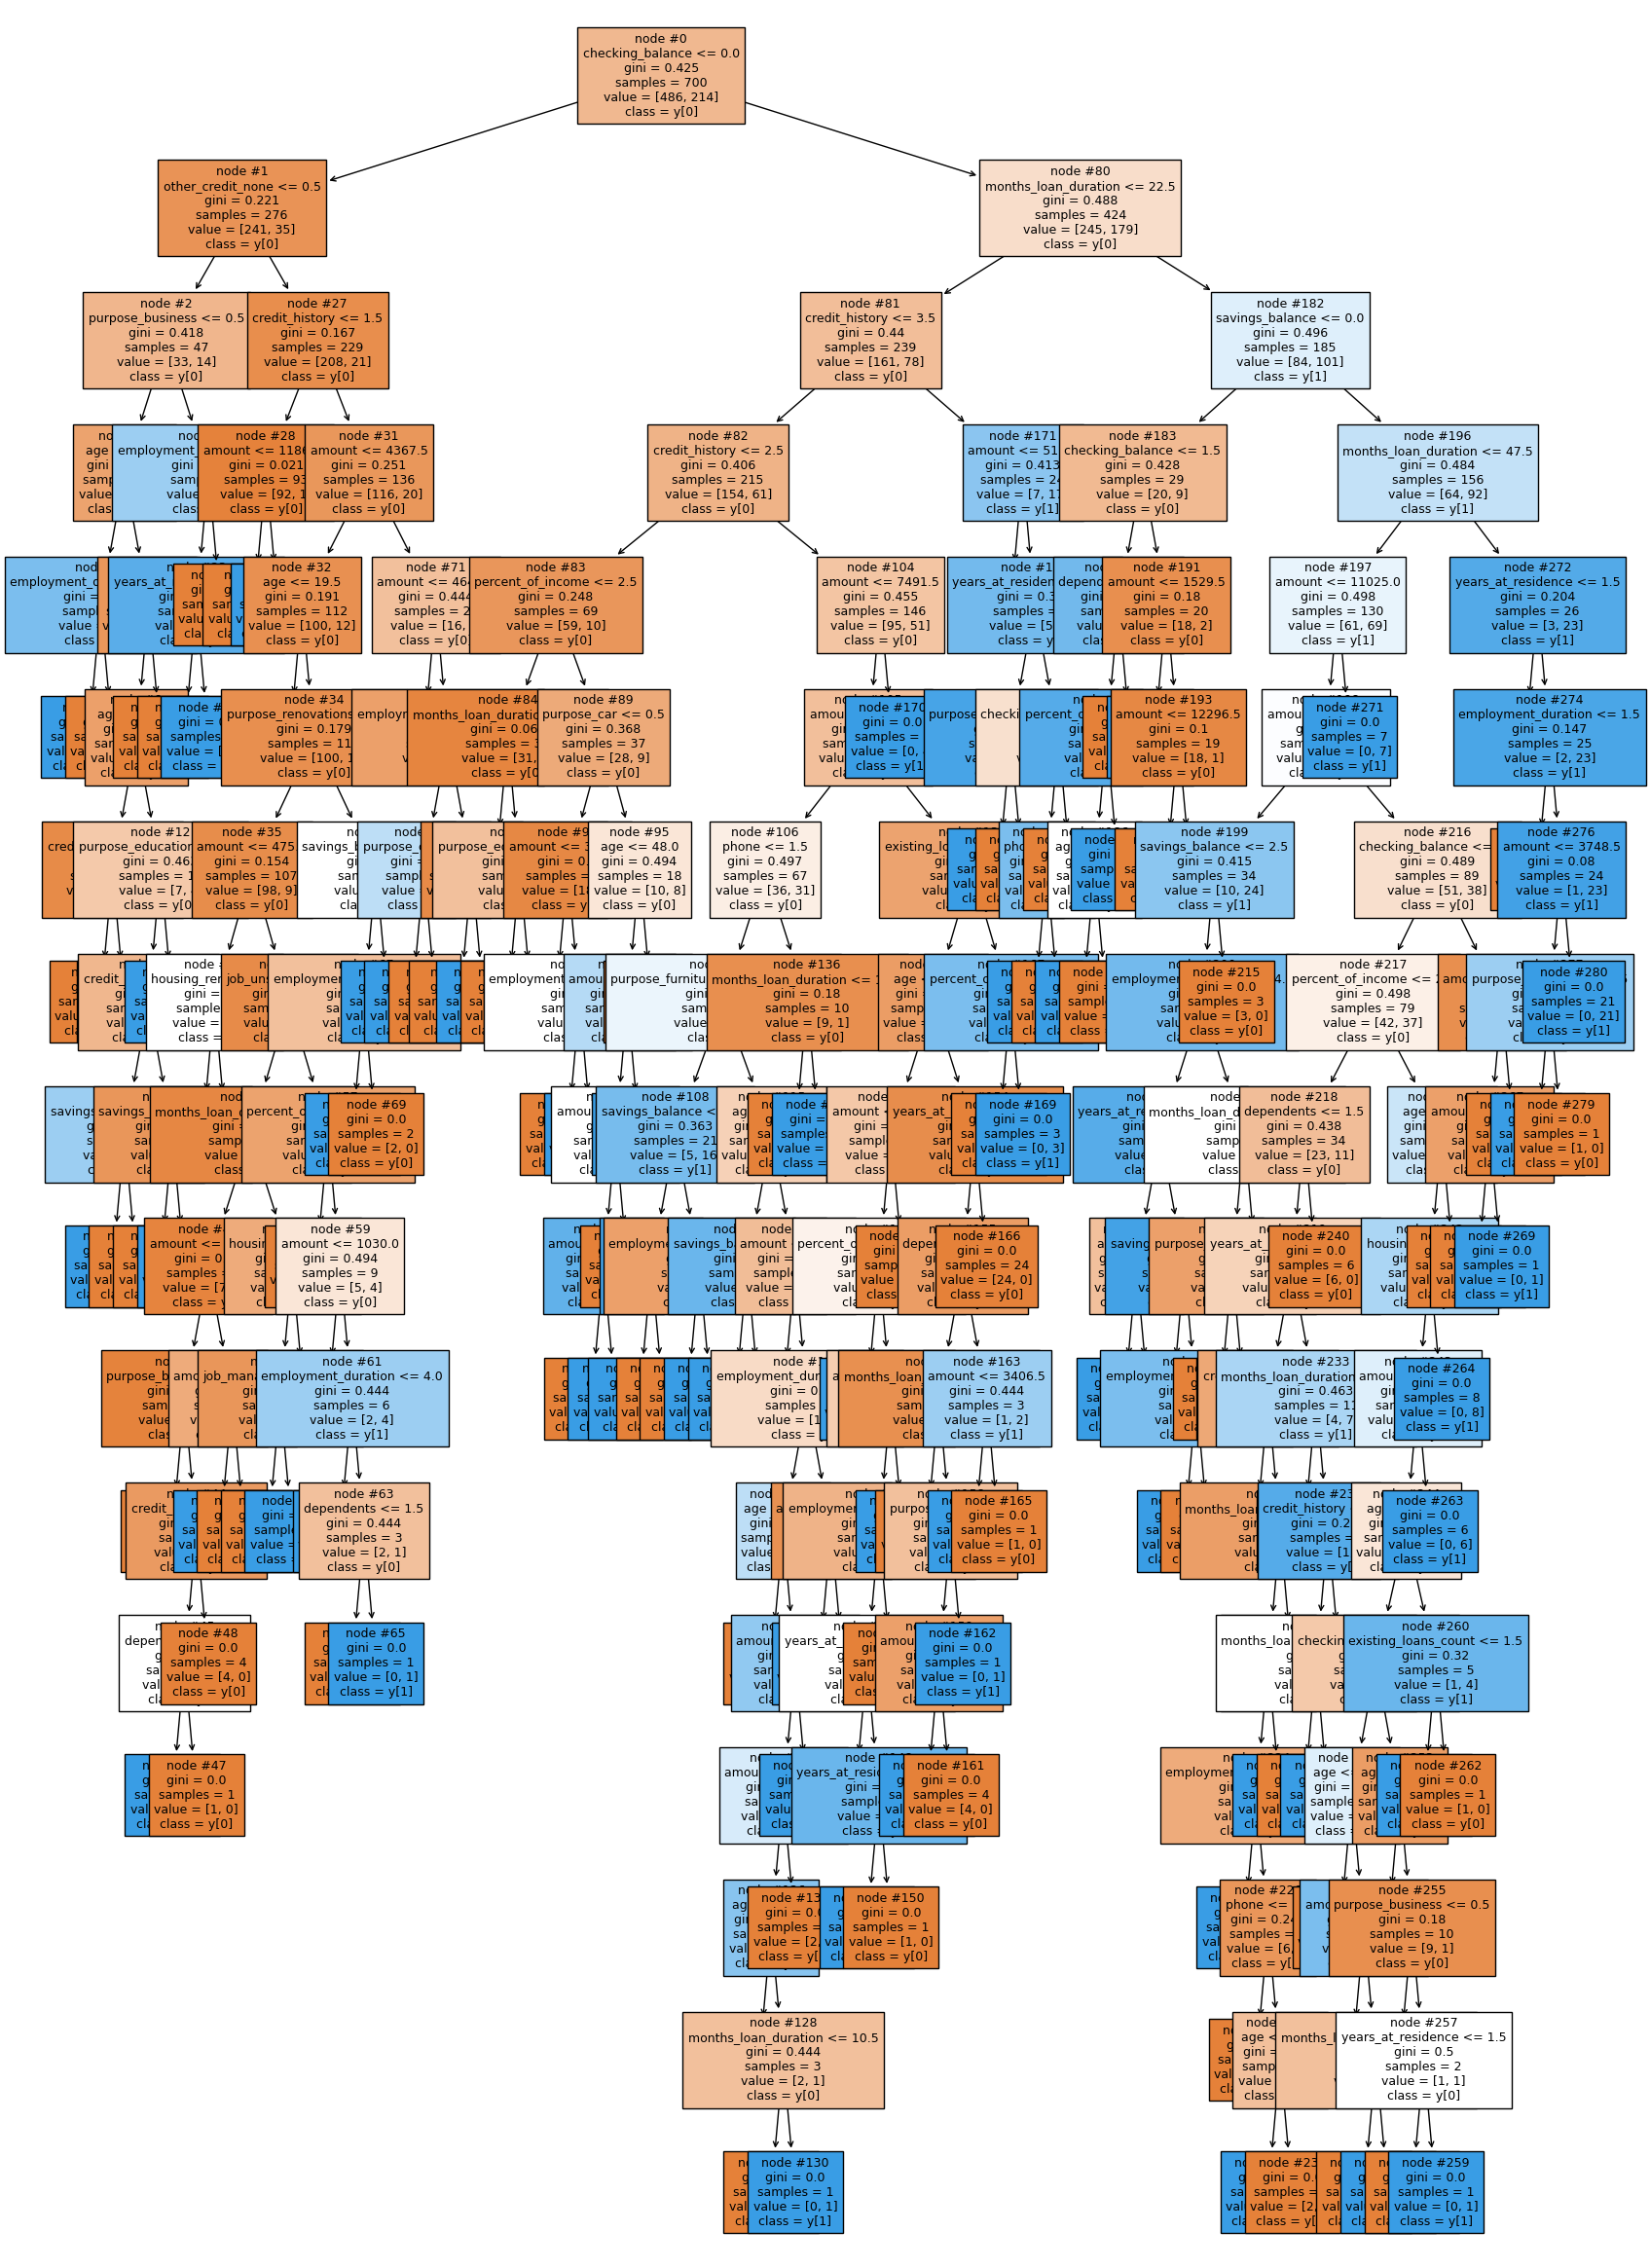

In [63]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [64]:

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- purpose_business <= 0.50
|   |   |   |--- age <= 25.50
|   |   |   |   |--- employment_duration <= 3.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- employment_duration >  3.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- age >  25.50
|   |   |   |   |--- age <= 38.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- credit_history <= 4.50
|   |   |   |   |   |   |   |--- weights: [13.00, 0.00] class: 0
|   |   |   |   |   |   |--- credit_history >  4.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- purpose_education <= 0.50
|   |   |   |   |   |   |   |--- credit_history <= 1.50
|   |   |   |   |   |   |   |   |--- savings_balance <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- sav

In [65]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
amount                        0.204163
checking_balance              0.136840
age                           0.110746
months_loan_duration          0.100323
employment_duration           0.073225
credit_history                0.065357
savings_balance               0.057059
years_at_residence            0.052719
percent_of_income             0.034128
purpose_business              0.023784
dependents                    0.023062
purpose_car                   0.021217
phone                         0.016737
housing_rent                  0.016646
purpose_education             0.013767
existing_loans_count          0.013575
purpose_furniture/appliances  0.012421
other_credit_none             0.011156
job_management                0.005769
purpose_renovations           0.004489
job_unskilled                 0.002818
other_credit_bank             0.000000
housing_own                   0.000000
other_credit_store            0.000000
housing_other            

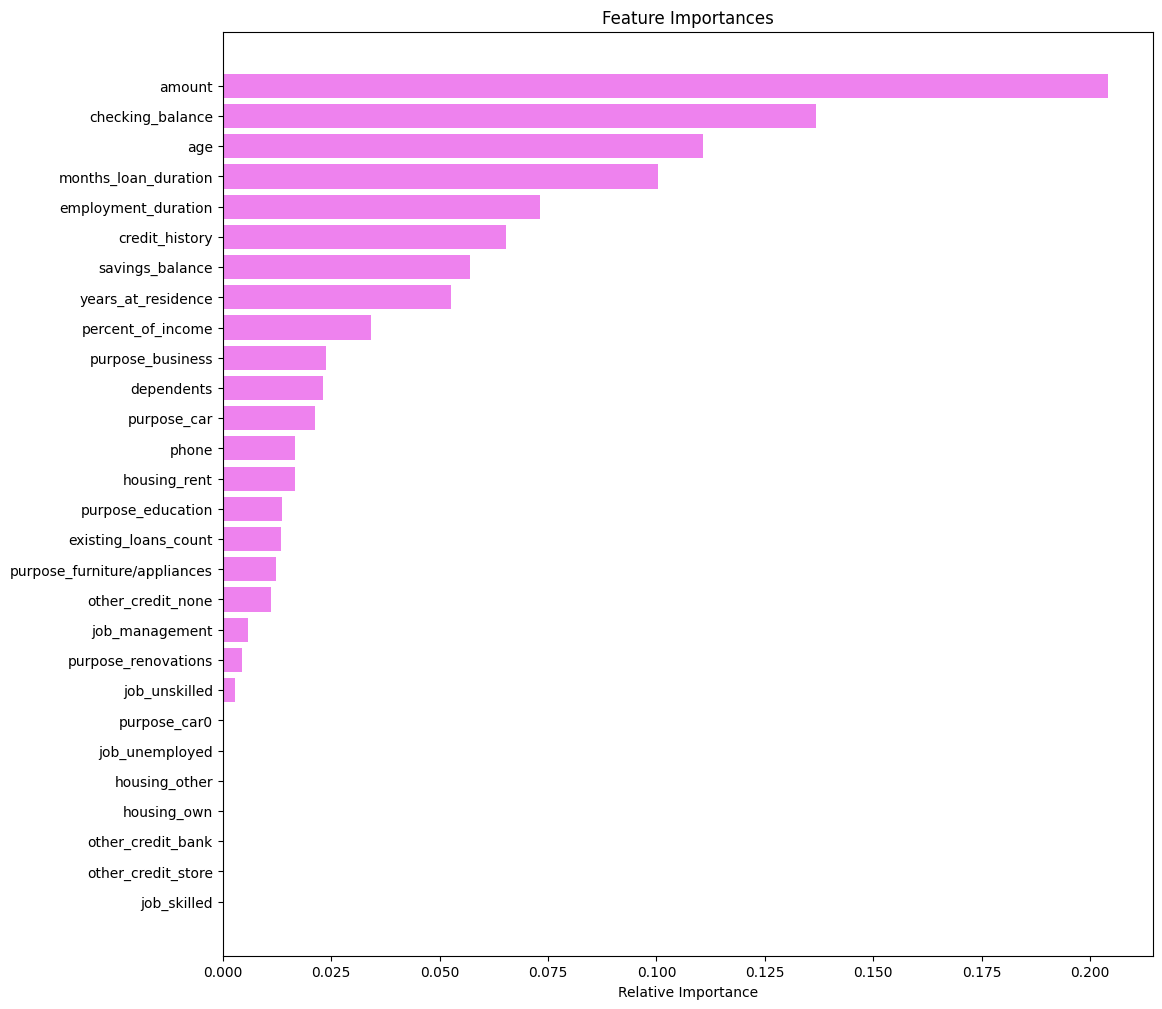

In [66]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()